<a href="https://colab.research.google.com/github/Thikshaya555/machinelearning/blob/master/imagedenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 86kB/s 
     |████████████████████████████████| 3.2MB 52.6MB/s 
     |████████████████████████████████| 491kB 49.2MB/s 
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
import time
start_time=time.time()
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
y_train=y_train.flatten()
y_test=y_test.flatten()

In [ ]:
y_train=y_train.flatten()
y_test=y_test.flatten()
x_train/=255
x_test/=255

In [ ]:
print(x_train.shape[0],'train samples')
print(x_train.shape[1],'height')
print(x_train.shape[2],'width')
print(x_train.shape[3],'channels')
print(x_test.shape[0],'test samples')

50000 train samples
32 height
32 width
3 channels
10000 test samples


In [ ]:
model=RandomForestClassifier(n_estimators=10)
cv_results=cross_val_score(model,x_train,y_train,cv=2,scoring='accuracy',n_jobs=-1,verbose=1)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   20.2s finished


In [ ]:
x_train=x_train.reshape(50000,3*32*32)
x_test=x_test.reshape(10000,3*32*32)
model.fit(x_train,y_train)
print();print(cv_results)
print();print(model)


[0.33496 0.33344]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
expected_y=y_test
predicted_y=model.predict(x_test)

In [ ]:
print();print(metrics.classification_report(expected_y,predicted_y))
print();print(metrics.confusion_matrix(expected_y,predicted_y))



              precision    recall  f1-score   support

           0       0.39      0.55      0.45      1000
           1       0.37      0.45      0.41      1000
           2       0.23      0.30      0.26      1000
           3       0.23      0.22      0.23      1000
           4       0.29      0.28      0.29      1000
           5       0.33      0.27      0.30      1000
           6       0.40      0.36      0.38      1000
           7       0.40      0.29      0.34      1000
           8       0.53      0.47      0.50      1000
           9       0.45      0.37      0.40      1000

    accuracy                           0.36     10000
   macro avg       0.36      0.36      0.36     10000
weighted avg       0.36      0.36      0.36     10000


[[548  66  75  25  36  22  21  19 137  51]
 [ 92 453  53  62  30  39  41  40  58 132]
 [129  59 296  89 155  73  96  53  24  26]
 [104  79 129 219  85 146  98  68  25  47]
 [ 84  38 226  88 284  57 107  78  21  17]
 [ 62  61 139 161 102 27

In [ ]:
print()
print("executiontime %s seconds"%(time.time()-start_time))


executiontime 2030.4074833393097 seconds


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('cat.png')

Saving cat.png to cat (1).png


513
710
3


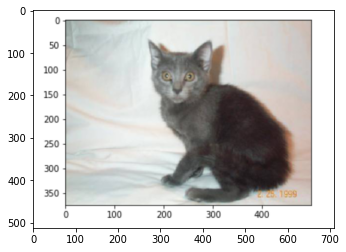

In [ ]:
img=plt.imshow(my_image)
print(my_image.shape[0])
print(my_image.shape[1])
print(my_image.shape[2])
my_image=my_image.reshape(513,710*3)

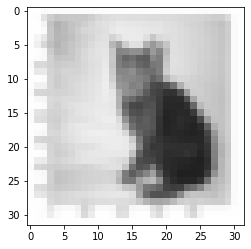

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)



In [ ]:
print(my_image_resized.shape)

(32, 96)


In [ ]:
my_image_resized=my_image_resized.reshape(32,32*3)

In [ ]:
nsamples, nx, ny = my_image_resized.shape
my_image_resized = my_image_resized.reshape((nsamples,nx*ny))

ValueError: ignored

In [ ]:
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))

ValueError: ignored